## House Price - Advanced Regression Assignment

## A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

## Objective
Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# pd.get_option('display.max_columns')
pd.set_option('display.max_columns', None)

In [2]:
# Reading the dataset

house_df = pd.read_csv('train.csv')

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
### Quality Checks 
(round(house_df.isnull().sum()/len(house_df),2)*100).sort_values(ascending=False).head(20)

PoolQC          100.0
MiscFeature      96.0
Alley            94.0
Fence            81.0
FireplaceQu      47.0
LotFrontage      18.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageType        6.0
GarageQual        6.0
GarageCond        6.0
BsmtExposure      3.0
BsmtQual          3.0
BsmtCond          3.0
BsmtFinType2      3.0
BsmtFinType1      3.0
MasVnrType        1.0
MasVnrArea        1.0
Id                0.0
Functional        0.0
dtype: float64

In [7]:
### Making 10% as threshhold and dropping those features
features_dropped = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage' ]

In [8]:
house_df.drop(features_dropped, axis=1, inplace=True)

In [9]:
house_df.drop(['Id'], axis=1, inplace=True)

In [10]:
house_df.shape

(1460, 74)

In [11]:
numerical_columns = []
for i in house_df.columns:
    print(house_df[i].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilb

In [12]:
### Dropping features with more than 90% with single value. Utilities, LandSlope, Condition2, RoofMatl, Heating, Electrical, Functional, GarageQual, GarageCond, PavedDrive, Street, LowQualFinSF, BsmtHalfBath, PoolArea
features_accumulated = ["Utilities", "LandSlope", "Condition2", "RoofMatl", "Heating", "Electrical", "Functional", "GarageQual", "GarageCond", "PavedDrive", "Street", "LowQualFinSF", "BsmtHalfBath", "PoolArea"]
house_df.drop(features_accumulated, axis=1, inplace=True)

In [13]:
# Converting years to age
house_df['YearBuilt_Age'] = house_df['YearBuilt'].max() - house_df['YearBuilt']
house_df['YearRemodAdd_Age'] = house_df['YearRemodAdd'].max() - house_df['YearRemodAdd']
house_df['YrSold_Age'] = house_df['YrSold'].max() - house_df['YrSold']
house_df['GarageYrBlt_Age'] = house_df['GarageYrBlt'].max() - house_df['GarageYrBlt']

# Dropping columns
house_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [14]:
numerical_columns=[]
categorical_columns=[]
for i in house_df.columns:
    if house_df[i].dtype != 'object':
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

In [15]:
print(numerical_columns)
print('\nTotal numerical columns:', len((numerical_columns)))

print(categorical_columns)
print('\nTotal Categorical columns:', len((categorical_columns)))

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age', 'GarageYrBlt_Age']

Total numerical columns: 33
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']

Total Categorical columns: 27


In [16]:
house_df[numerical_columns].head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,0,0,0,0,2,208500,7,7,2,7.0
1,20,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,0,0,0,0,5,181500,34,34,3,34.0
2,60,11250,7,5,162.0,486,0,434,920,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,0,0,0,0,9,223500,9,8,2,9.0
3,70,9550,7,5,0.0,216,0,540,756,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,272,0,0,0,2,140000,95,40,4,12.0
4,60,14260,8,5,350.0,655,0,490,1145,1145,1053,2198,1,2,1,4,1,9,1,3,836,192,84,0,0,0,0,12,250000,10,10,2,10.0


#### Data Visualization

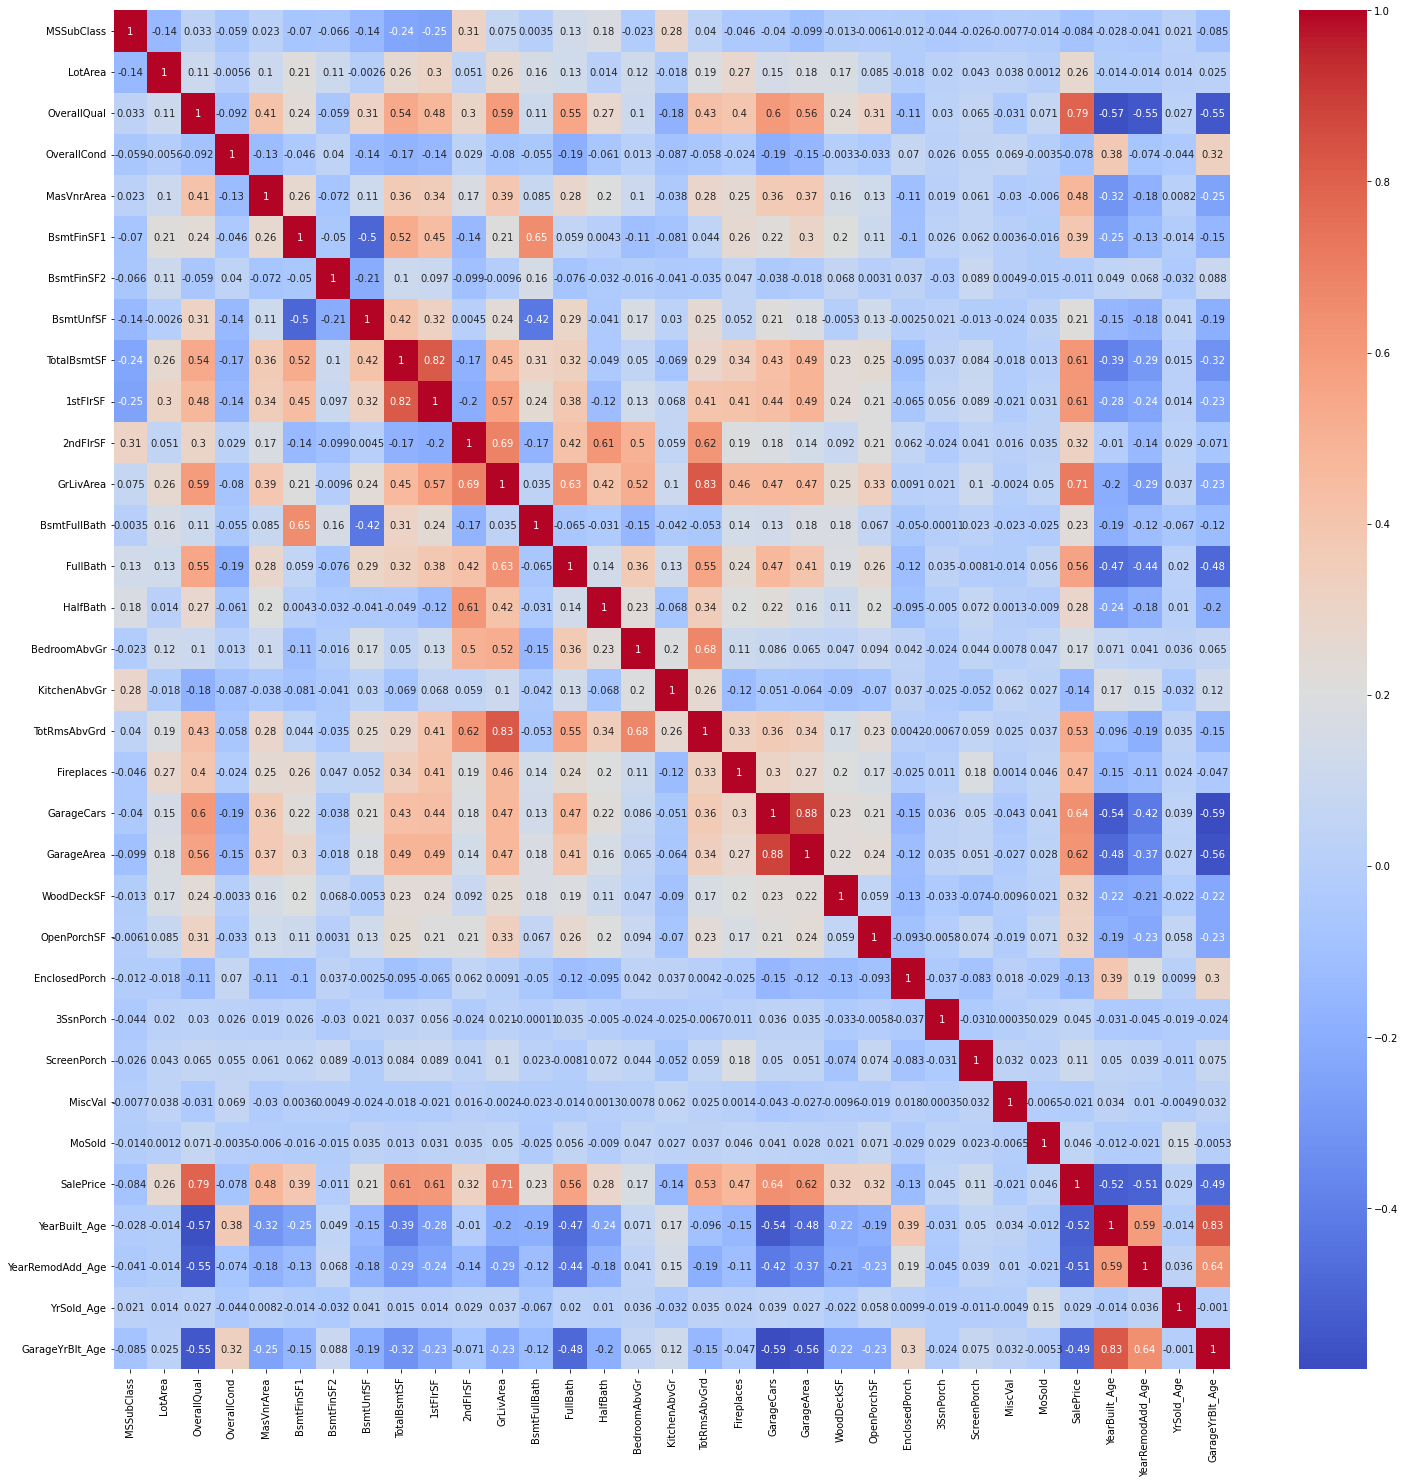

In [18]:
# Plotting a scatter plot

fig = plt.figure(figsize=(25,25))
sns.heatmap(house_df[numerical_columns].corr(), cmap="coolwarm", annot = True)
plt.show()

## Dropping features which are highly correlated.
GarageArea, GarageCars are highly correlated so we are we are dropping one of the feature(GarageCars).
YearBuilt_Age, GarageYrBlt_Age are highly correlated so we are dropping one of the feature(GarageYrBlt_Age).
1stFlrSF, TotalBsmtSF are highly correlated so we are dropping one of the feature(1stFlrSF).
TotRmsAbvGrd, GrLivArea are highly correlated so we are dropping one of the feature(TotRmsAbvGrd).

In [19]:
highly_correlated_columns=['GarageCars', 'GarageYrBlt_Age', '1stFlrSF', 'TotRmsAbvGrd']
house_df.drop(highly_correlated_columns, axis=1, inplace=True)

In [20]:
house_df.shape

(1460, 56)

In [21]:
house_df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,854,1710,1,2,1,3,1,Gd,0,Attchd,RFn,548,0,61,0,0,0,0,2,WD,Normal,208500,7,7,2
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,0,1262,0,2,0,3,1,TA,1,Attchd,RFn,460,298,0,0,0,0,0,5,WD,Normal,181500,34,34,3
2,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,866,1786,1,2,1,3,1,Gd,1,Attchd,RFn,608,0,42,0,0,0,0,9,WD,Normal,223500,9,8,2
3,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,756,1717,1,1,0,3,1,Gd,1,Detchd,Unf,642,0,35,272,0,0,0,2,WD,Abnorml,140000,95,40,4
4,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,1053,2198,1,2,1,4,1,Gd,1,Attchd,RFn,836,192,84,0,0,0,0,12,WD,Normal,250000,10,10,2


In [22]:
# setting dummies for categorical columns
for i in categorical_columns:
    # set the dummies to the categorical value columns
    dummy = pd.get_dummies(house_df[i], drop_first=True)
    # add prefix to the new dummy columns to identify which original column it belongs
    dummy = dummy.add_prefix(f'{i}_')
    # concatenate with the original dataframe
    house_df = pd.concat([house_df, dummy], axis=1)
print(house_df.shape)

(1460, 209)


In [23]:
house_df.drop(categorical_columns, axis=1, inplace=True)

In [24]:
house_df.shape

(1460, 182)

## Splitting into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(house_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
print('Training data:', df_train.shape)
print('Testing data:', df_test.shape)

Training data: (1021, 182)
Testing data: (438, 182)


In [27]:
non_dummies = []
for i in house_df.columns:
    if house_df[i].dtype != 'uint8':
        non_dummies.append(i)
print(non_dummies)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age']


### Applying the scaler function to all columns except dummy columns 

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the columns except the 'dummy' variables

df_train[non_dummies] = scaler.fit_transform(df_train[non_dummies])

df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.019306,0.444444,0.625,0.00,0.082920,0.0,0.169521,0.141408,0.000000,0.081860,0.333333,0.333333,0.0,0.250,0.0,0.000000,0.000000,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.272727,0.087627,0.615942,1.000000,0.50,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.235294,0.039403,0.666667,0.500,0.16,0.174876,0.0,0.154110,0.220458,0.616949,0.424289,0.333333,0.666667,0.5,0.500,0.0,0.333333,0.462623,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.272727,0.312595,0.123188,0.283333,0.25,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0

In [30]:
df_test[non_dummies] = scaler.transform(df_test[non_dummies])

In [31]:
print('Training data:', df_train.shape)
print('Testing data:', df_test.shape)

Training data: (1021, 182)
Testing data: (438, 182)


### Divide into X and Y sets for the model building

In [33]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 181)
(438, 181)
(1021,)
(438,)


In [35]:
X_train.dtypes

MSSubClass               float64
LotArea                  float64
OverallQual              float64
OverallCond              float64
MasVnrArea               float64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 181, dtype: object

In [36]:
X_train.isnull().sum().sort_values(ascending=False)

MasVnrArea               4
MSSubClass               0
ExterCond_Fa             0
Exterior2nd_VinylSd      0
Exterior2nd_Wd Sdng      0
                        ..
Neighborhood_Somerst     0
Neighborhood_StoneBr     0
Neighborhood_Timber      0
Neighborhood_Veenker     0
SaleCondition_Partial    0
Length: 181, dtype: int64

In [37]:
X_train[X_train['MasVnrArea'].isnull()]

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1243,0.000000,0.058072,1.000000,0.5,NaN,0.245571,0.0,0.295377,0.339771,0.000000,0.314758,0.333333,0.666667,0.5,0.250,0.0,0.333333,0.599436,0.252042,0.437859,0.0,0.0,0.0,0.0,0.727273,0.028986,0.066667,1.00,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
973,0.000000,0.047538,0.666667,0.5,NaN,0.000000,0.0,0.611301,0.233715,0.000000,0.190238,0.000000,0.666667,0.0,0.375,0.0,0.000000,0.338505,0.000000,0.229446,0.0,0.0,0.0,0.0,1.000000,0.021739,0.033333,0.50,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
936,0.000000,0.040259,0.666667,0.5,N

In [38]:
X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].mode()[0], inplace=True)
X_test['MasVnrArea'].fillna(X_test['MasVnrArea'].mode()[0], inplace=True)

### Using RFE for Feature selection

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50)             
rfe = rfe.fit(X_train, y_train)      

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 79),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 83),
 ('BedroomAbvGr', False, 127),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 16),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 45),
 ('EnclosedPorch', False, 99),
 ('3SsnPorch', False, 7),
 ('ScreenPorch', False, 46),
 ('MiscVal', False, 70),
 ('MoSold', False, 92),
 ('YearBuilt_Age', True, 1),
 ('YearRemodAdd_Age', False, 38),
 ('YrSold_Age', False, 82),
 ('MSZoning_FV', False, 21),
 ('MSZoning_RH', False, 11),
 ('MSZoning_RL', False, 12),
 ('MSZoning_RM', False, 13),
 ('LotShape_IR2', False, 91),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 110),
 ('LandContour_HLS', True, 1),
 ('LandC

In [54]:
cols=X_train.columns[rfe.support_]
cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF',
       'YearBuilt_Age', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior2nd_AsphShn', 'Exterior2nd_ImStucc',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Slab',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'SaleType_Con',
       'SaleCondition_Parti

In [55]:
X_train_rfe = X_train[cols]
X_test = X_test[cols]

In [56]:
import statsmodels.api as sm  
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     135.5
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:59:27   Log-Likelihood:                 1848.4
No. Observations:                1021   AIC:                            -3599.
Df Residuals:                     972   BIC:                            -3357.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0781      0.036      2.156      0.031       0.007       0.149
LotArea                   0.1063      0.033      3.225      0.001       0.042       0.171
OverallQual               0.1277      0.016      8.053      0.000       0.097       0.159
OverallCond               0.0651      0.012      5.633      0.000       0.042       0.088
MasVnrArea                0.0275      0.013      2.041      0.042       0.001       0.054
BsmtFinSF1                0.0199      0.021      0.966      0.334      -0.021       0.060
BsmtFinSF2                0.0054      0.012      0.446      0.655      -0.018       0.029
BsmtUnfSF                 0.0130      0.010      1.305      0.192      -0.007       0.033
TotalBsmtSF               0.0247      0.022      1.136      0.256      -0.018       0.067
2ndFlrSF                  0.0462      0.017      2.653      0.008       0.012       0.080
GrLivArea                 0.2890      0.039      7.500      0.000       0.213       0.365
BsmtFullBath              0.0492      0.010      4.815      0.000       0.029       0.069
FullBath                  0.0326      0.011      2.958      0.003       0.011       0.054
KitchenAbvGr             -0.0736      0.013     -5.573      0.000      -0.099      -0.048
GarageArea                0.0323      0.012      2.687      0.007       0.009       0.056
WoodDeckSF                0.0230      0.010      2.357      0.019       0.004       0.042
YearBuilt_Age            -0.0784      0.011     -6.885      0.000      -0.101      -0.056
LotShape_IR3             -0.0461      0.015     -3.111      0.002      -0.075      -0.017
LandContour_HLS           0.0332      0.010      3.352      0.001       0.014       0.053
LandContour_Low           0.0448      0.011      4.157      0.000       0.024       0.066
LandContour_Lvl           0.0323      0.007      4.816      0.000       0.019       0.045
Neighborhood_Crawfor      0.0476      0.008      5.950      0.000       0.032       0.063
Neighborhood_Edwards     -0.0217      0.005     -4.181      0.000      -0.032      -0.011
Neighborhood_NoRidge      0.0843      0.008     10.004      0.000       0.068       0.101
Neighborhood_NridgHt      0.0487      0.007      6.819      0.000       0.035       0.063
Neighborhood_Somerst      0.0286      0.006      4.476      0.000       0.016       0.041
Neighborhood_StoneBr      0.0536      0.012      4.381      0.000       0.030       0.078
Neighborhood_Veenker      0.0236      0.013      1.797      0.073      -0.002       0.049
BldgType_Twnhs           -0.0451      0.008     -5.970      0.000      -0.060      -0.030
BldgType_TwnhsE          -0.0289      0.005     -5.317      0.000      -0.040      -0.018
HouseStyle_1.5Unf         0.0205      0.012      1.668      0.096      -0.004       0.045
HouseStyle_1Story      

In [58]:
X_train_rfe1 = X_train_rfe.drop(['Exterior1st_ImStucc', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'SaleType_Con' ] , axis=1)

X_test = X_test.drop(['Exterior1st_ImStucc', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'SaleType_Con' ] , axis=1)

In [59]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe1).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     154.3
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:59:56   Log-Likelihood:                 1844.2
No. Observations:                1021   AIC:                            -3602.
Df Residuals:                     978   BIC:                            -3390.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0254      0.017      1.533      0.126      -0.007       0.058
LotArea                   0.1054      0.033      3.198      0.001       0.041       0.170
OverallQual               0.1300      0.016      8.271      0.000       0.099       0.161
OverallCond               0.0646      0.011      5.863      0.000       0.043       0.086
MasVnrArea                0.0269      0.013      2.002      0.046       0.001       0.053
BsmtFinSF1                0.0226      0.020      1.114      0.265      -0.017       0.063
BsmtFinSF2                0.0054      0.012      0.446      0.656      -0.018       0.029
BsmtUnfSF                 0.0158      0.010      1.607      0.108      -0.004       0.035
TotalBsmtSF               0.0283      0.021      1.324      0.186      -0.014       0.070
2ndFlrSF                  0.0509      0.017      2.967      0.003       0.017       0.085
GrLivArea                 0.2820      0.038      7.426      0.000       0.208       0.357
BsmtFullBath              0.0498      0.010      4.873      0.000       0.030       0.070
FullBath                  0.0324      0.011      2.952      0.003       0.011       0.054
KitchenAbvGr             -0.0750      0.013     -5.733      0.000      -0.101      -0.049
GarageArea                0.0326      0.012      2.728      0.006       0.009       0.056
WoodDeckSF                0.0235      0.010      2.401      0.017       0.004       0.043
YearBuilt_Age            -0.0777      0.011     -6.883      0.000      -0.100      -0.056
LotShape_IR3             -0.0459      0.015     -3.099      0.002      -0.075      -0.017
LandContour_HLS           0.0333      0.010      3.358      0.001       0.014       0.053
LandContour_Low           0.0449      0.011      4.164      0.000       0.024       0.066
LandContour_Lvl           0.0326      0.007      4.856      0.000       0.019       0.046
Neighborhood_Crawfor      0.0470      0.008      5.872      0.000       0.031       0.063
Neighborhood_Edwards     -0.0213      0.005     -4.144      0.000      -0.031      -0.011
Neighborhood_NoRidge      0.0821      0.008      9.861      0.000       0.066       0.098
Neighborhood_NridgHt      0.0486      0.007      6.802      0.000       0.035       0.063
Neighborhood_Somerst      0.0292      0.006      4.592      0.000       0.017       0.042
Neighborhood_StoneBr      0.0529      0.012      4.321      0.000       0.029       0.077
Neighborhood_Veenker      0.0261      0.013      2.023      0.043       0.001       0.051
BldgType_Twnhs           -0.0450      0.008     -5.947      0.000      -0.060      -0.030
BldgType_TwnhsE          -0.0281      0.005     -5.179      0.000      -0.039      -0.017
HouseStyle_1.5Unf         0.0208      0.012      1.696      0.090      -0.003       0.045
HouseStyle_1Story      

In [70]:
y_train_pred = lm.predict(X_train_rfe1)

In [71]:
y_test.shape

(438,)

In [72]:
X_train_rfe1.columns

Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageArea',
       'WoodDeckSF', 'YearBuilt_Age', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'RoofStyle_Gambrel', 'Exterior1st_BrkFace',
       'Exterior2nd_ImStucc', 'Foundation_Slab', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'SaleCondition_Partial'],
      dtype='object')

In [73]:
# Find the value of r squared
r2_score(y_train , y_train_pred) # The predictors considered explain about 86.9% of the variation in the data

0.8689012847412232

In [76]:
y_pred=y_train_pred

In [77]:
print(X_train_rfe1.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(1021, 44)
(438, 43)
(1021,)
(438,)
(1021,)


In [78]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y_train - y_pred))
print(rss)
mse = mean_squared_error(y_train, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1.6131734219910543
0.0015799935572880061
0.03974913278661569


#### Check for assumptions

In [79]:
# Residual analysis
y_res = y_train - y_pred

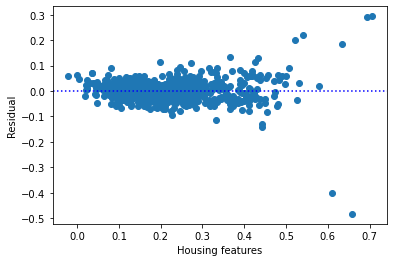

In [80]:
# Residual v/s predictions plot
plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='b', linestyle=':')
plt.xlabel("Housing features")
plt.ylabel("Residual")
plt.show()

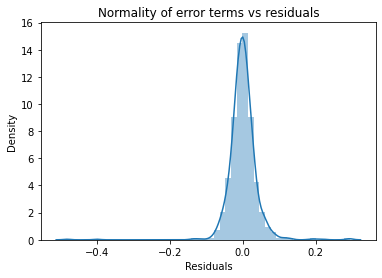

In [81]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms vs residuals')
plt.xlabel("Residuals")
plt.show()

### Polinomial Regression

In [82]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# Building the polynomial regression model with degree 5
degree=2 # got this number through trial and this is the lowest value which fit the data perfectly
polyreg2 = PolynomialFeatures(degree)
X_poly2 = polyreg2.fit_transform(X_train) # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg2 = LinearRegression()
linreg2.fit(X_poly2, y_train)

LinearRegression()

In [84]:
y_pred2 = linreg2.predict(X_poly2) # store predictions from the polynomial regression in the variable y_pred5
print(r2_score(y_train, y_pred2))

1.0


In [85]:
y_res2 = y_train - y_pred2 

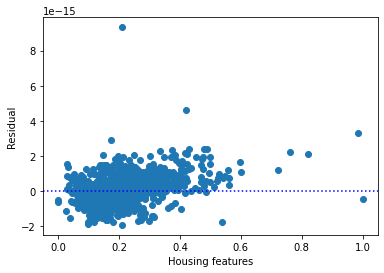

In [86]:
# Residual v/s predictions plot

plt.scatter( y_pred2 , y_res2)
plt.axhline(y=0, color='b', linestyle=':')
plt.xlabel("Housing features")
plt.ylabel("Residual")
plt.show()

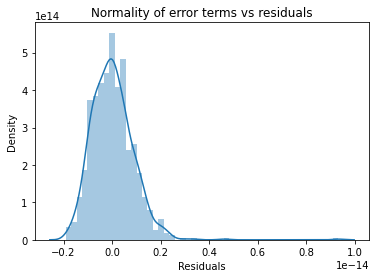

In [87]:
# Distribution of errors
p = sns.distplot(y_res2,kde=True)

p = plt.title('Normality of error terms vs residuals')
plt.xlabel("Residuals")
plt.show()

#### The r2_score of polinomial regression model, the model is highly overfitted,now we will implemnet Ridge and Lasso regression to avoid problem of overfitting.

In [88]:
house_df.shape

(1460, 182)

### Lasso Regression

In [90]:
X_train = X_train_rfe1.drop('const', axis=1)
y_train.shape

X_test.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenAbvGr,GarageArea,WoodDeckSF,YearBuilt_Age,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,RoofStyle_Gambrel,Exterior1st_BrkFace,Exterior2nd_ImStucc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Partial
1436,0.035192,0.333333,0.625,0.00000,0.109142,0.0,0.106164,0.141408,0.000000,0.081860,0.000000,0.333333,0.0,0.372355,0.000000,0.282609,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
57,0.047566,0.666667,0.500,0.00000,0.000000,0.0,0.368151,0.140753,0.416465,0.246349,0.000000,0.666667,0.0,0.398449,0.000000,0.043478,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
780,0.029930,0.666667,0.500,0.02375,0.000000,0.0,0.529538,0.202455,0.000000,0.156610,0.000000,0.666667,0.0,0.283498,0.256709,0.108696,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
382,0.036338,0.666667,0.500,0.00000,0.000000,0.0,0.401969,0.153682,0.415496,0.261145,0.000000,0.666667,0.0,0.450635,0.168028,0.028986,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1170,0.039309,0.555556,0.625,0.00000,0.092488,0.0,0.245719,0.179378,0.000000,0.130669,0.333333,0.333333,0.0,0.252468,0.236873,0.239130,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 43)
(438, 43)
(1021,)
(438,)


In [92]:
alphas = [0.0001, 0.001, 0.01, 0, 0.05, 0.1, 
  0.5, 1.0, 5.0, 10.0 ]


def test_alpha(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train, y_train) 
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test, pred_test_lasso)
    print('ALPHA: {:.4f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha(alpha)

ALPHA: 0.0001 R2 SCORE: 0.8568% new_score, 0.0
ALPHA: 0.0010 R2 SCORE: 0.7967% new_score, 0.0
ALPHA: 0.0100 R2 SCORE: 0.2729% new_score, 0.0
ALPHA: 0.0000 R2 SCORE: 0.8570% new_score, 0.0
ALPHA: 0.0500 R2 SCORE: -0.0003% new_score, 0.0
ALPHA: 0.1000 R2 SCORE: -0.0003% new_score, 0.0
ALPHA: 0.5000 R2 SCORE: -0.0003% new_score, 0.0
ALPHA: 1.0000 R2 SCORE: -0.0003% new_score, 0.0
ALPHA: 5.0000 R2 SCORE: -0.0003% new_score, 0.0
ALPHA: 10.0000 R2 SCORE: -0.0003% new_score, 0.0


At hyperparameter of value 0.0001 thus the Lasso model perform better with high R2 Score of 0.86

In [94]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0,
                                   20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [95]:
cv_result_train_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005066,0.000909,0.002288,0.000410,0.0001,{'alpha': 0.0001},0.905031,0.611284,0.904948,0.682466,0.899174,0.881440,0.901901,0.812254,0.894982,0.876809,0.837029,0.099843,1,0.862457,0.894805,0.863678,0.881343,0.861006,0.864887,0.863802,0.872243,0.863194,0.863887,0.869130,0.010332
1,0.002716,0.000475,0.001354,0.000452,0.0010,{'alpha': 0.001},0.862184,0.641545,0.828762,0.691961,0.844482,0.863894,0.857961,0.754188,0.817480,0.844594,0.800705,0.074353,2,0.803202,0.833594,0.807443,0.821746,0.802126,0.807522,0.807105,0.813466,0.803731,0.804928,0.810486,0.009479
2,0.002231,0.000441,0.001385,0.000476,0.0100,{'alpha': 0.01},0.285346,0.189647,0.352415,0.329301,0.276647,0.394780,0.374273,0.249782,0.233673,0.304721,0.299059,0.061626,3,0.293947,0.311969,0.294961,0.294010,0.287756,0.282590,0.287924,0.297781,0.304947,0.294028,0.294991,0.008088
3,0.002476,0.000800,0.001636,0.000628,0.1000,{'alpha': 0.1},-0.010958,-0.010191,-0.000095,-0.000009,-0.044835,-0.002481,-0.005662,-0.001807,-0.001329,-0.000991,-0.007836,0.012901,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002436,0.000356,0.001313,0.000448,1.0000,{'alpha': 1.0},-0.010958,-0.010191,-0.000095,-0.000009,-0.044835,-0.002481,-0.005662,-0.001807,-0.001329,-0.000991,-0.007836,0.012901,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [96]:
def r2_score(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

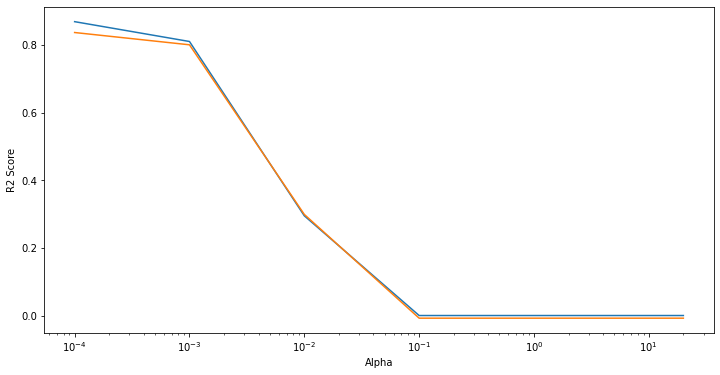

In [97]:
r2_score(cv_result_train_lasso, True)

In [98]:
# Now that we have optimal value of alpha = 0.0001, we can use this alpha to run the model again
#Lasso
import sklearn.metrics as metrics
lm = Lasso(alpha=0.0001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8668378398277761
0.8567797368069808


### Ridge Regression

In [107]:
cv_result_train_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002677,0.003735,0.001185,0.002488,0.0001,{'alpha': 0.0001},0.903856,0.598760,0.906140,0.672537,0.900282,0.875709,0.894074,0.812768,0.880099,0.884761,0.832899,0.103138,7,0.864446,0.896821,0.865672,0.883297,0.863063,0.866993,0.865904,0.874276,0.865502,0.865687,0.871166,0.010311
1,0.001654,0.002676,0.001491,0.002993,0.0010,{'alpha': 0.001},0.903852,0.598808,0.906139,0.672567,0.900274,0.875706,0.894081,0.812773,0.880131,0.884771,0.832910,0.103124,6,0.864446,0.896821,0.865672,0.883297,0.863063,0.866993,0.865904,0.874276,0.865502,0.865687,0.871166,0.010311
2,0.003376,0.006773,0.000640,0.001761,0.0100,{'alpha': 0.01},0.903819,0.599291,0.906134,0.672863,0.900188,0.875671,0.894147,0.812813,0.880445,0.884866,0.833024,0.102981,5,0.864445,0.896820,0.865672,0.883296,0.863063,0.866993,0.865903,0.874275,0.865501,0.865687,0.871165,0.010311
3,0.004376,0.006610,0.000183,0.000367,0.1000,{'alpha': 0.1},0.903491,0.604057,0.906030,0.675553,0.899367,0.875352,0.894751,0.813076,0.883206,0.885622,0.834051,0.101584,4,0.864404,0.896784,0.865628,0.883239,0.863023,0.866954,0.865858,0.874216,0.865438,0.865634,0.871118,0.010312
4,0.000295,0.000680,0.000000,0.000000,1.0000,{'alpha': 1.0},0.901052,0.640751,0.903566,0.691406,0.893727,0.874487,0.898294,0.811095,0.894672,0.886995,0.839604,0.091134,2,0.863041,0.894937,0.864219,0.881463,0.861734,0.865702,0.864370,0.872481,0.863506,0.864122,0.869558,0.010171


In [106]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0,
                                   20.0]},
             return_train_score=True, scoring='r2', verbose=1)

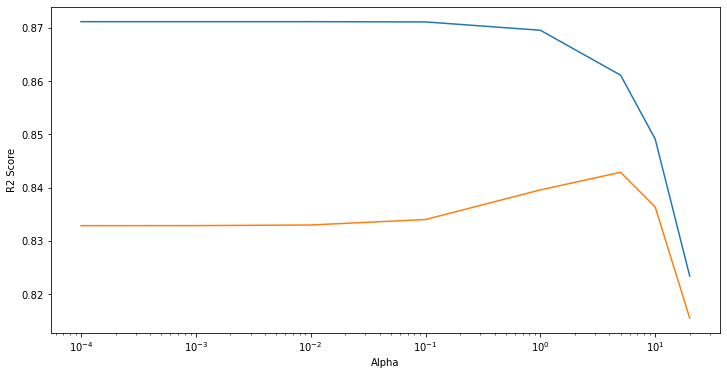

In [108]:
# plot r2_score using the defined function for ridge
r2_score(cv_result_train_ridge, True)

The optimum alpha for Ridge is 7

## Conclusion

Ridge Model Performs better for both training and test data with hyperparameter 0.1
